## Data Science Project
## Predicting Contraceptive Method Choice/Usage with Machine Learning and TPOT(Auto ML Pipeline Generator)
### Plan
+ EDA
+ Model Building
+ TPOT For automatically generating the best ML Model
+ Model Interpretation with Eli5
+ Productionize with Streamlit

#### Dataset
+ Source:https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

#### Problem
+ This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview.
+ The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

### TPOT
+ optimize a series of features in order to maximize cross validation
+ Uses Genetic Programming Concept 
    - Natural Selection and Survival of the fittest
<details>
    About finding the best model and it parameters, just like with natural selection
</details>


1. Selection
2. Crossover
3. Mutation

#### NB
+ Remove Missing Values
+ Must be categorical and numbers


#### Installation
pip install tpot

#### TPOT
+ TPOT
+ TPOTClassifier
+ TPOTRegressor

#### TPOT terms
+ Generations: how many generation 

In [1]:
# Load Our EDA Pkgs
import pandas as pd
import numpy as np

In [3]:
# Load ML Pkgs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Attributes
   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term

In [7]:
# Our Columns
col_names = ["Wife's age",                    
"Wife's education",              
"Husband's education",            
"Number of children ever born",   
"Wife's religion",               
"Wife's now working?",            
"Husband's occupation",           
"Standard-of-living index",      
"Media exposure",                 
"Contraceptive method used"] 

In [8]:
# Load dataset
df = pd.read_csv("data_cmc/cmc.data",names=col_names)

In [9]:
df.head()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [10]:
# Columns
df.columns

Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children ever born', 'Wife's religion',
       'Wife's now working?', 'Husband's occupation',
       'Standard-of-living index', 'Media exposure',
       'Contraceptive method used'],
      dtype='object')

In [11]:
# Clean Columns
df.columns = df.columns.str.replace(" ","_").str.lower()

In [12]:
df.columns

Index(['wife's_age', 'wife's_education', 'husband's_education',
       'number_of_children_ever_born', 'wife's_religion',
       'wife's_now_working?', 'husband's_occupation',
       'standard-of-living_index', 'media_exposure',
       'contraceptive_method_used'],
      dtype='object')

In [14]:
# Value Counts
df['contraceptive_method_used'].value_counts()

1    629
3    511
2    333
Name: contraceptive_method_used, dtype: int64

In [15]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline

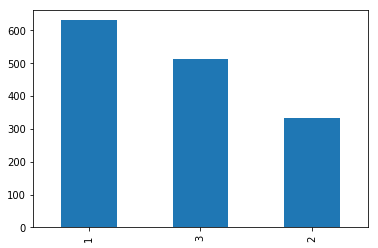

In [16]:
df['contraceptive_method_used'].value_counts().plot(kind="bar")

#### Narative
+ 1=No-use
+ 2=Long-term
+ 3=Short-term


#### More people did not use contraceptive

In [19]:
# Rename To Class
df.rename(columns={'contraceptive_method_used':'class'},inplace=True)

In [20]:
df.columns

Index(['wife's_age', 'wife's_education', 'husband's_education',
       'number_of_children_ever_born', 'wife's_religion',
       'wife's_now_working?', 'husband's_occupation',
       'standard-of-living_index', 'media_exposure', 'class'],
      dtype='object')

In [21]:
#### Check for missing values
df.isnull().sum()

wife's_age                      0
wife's_education                0
husband's_education             0
number_of_children_ever_born    0
wife's_religion                 0
wife's_now_working?             0
husband's_occupation            0
standard-of-living_index        0
media_exposure                  0
class                           0
dtype: int64

In [24]:
# Profile Dataset
import pandas_profiling as pp

In [25]:
dir(pp)

['Path',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_column_names',
 'config',
 'controller',
 'describe_df',
 'get_config_default',
 'get_project_root',
 'model',
 'np',
 'pandas_decorator',
 'rename_index',
 'sys',
 'templates',
 'to_html',
 'utils',
 'version',
 'view',
 'warnings']

In [26]:
pp.ProfileReport(df)

In [27]:
# Shape
df.shape

(1473, 10)

#### Features and Model Building

In [34]:
# Features
x = df.iloc[:,0:9]

In [36]:
x.head(20)

,wife's_age,wife's_education,husband's_education,number_of_children_ever_born,wife's_religion,wife's_now_working?,husband's_occupation,standard-of-living_index,media_exposure
0,24,2,3,3,1,1,2,3,0
1,45,1,3,10,1,1,3,4,0
2,43,2,3,7,1,1,3,4,0
3,42,3,2,9,1,1,3,3,0
4,36,3,3,8,1,1,3,2,0
5,19,4,4,0,1,1,3,3,0
6,38,2,3,6,1,1,3,2,0
7,21,3,3,1,1,0,3,2,0
8,27,2,3,3,1,1,3,4,0
9,45,1,1,8,1,1,2,2,1


In [37]:
# Labels
ylabels = df['class']

#### Split Dataset

In [39]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,ylabels,test_size=0.33, random_state=42)

In [40]:
x_train.shape

(986, 9)

#### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [44]:
cv_scores = cross_val_score(LogisticRegression(),x,ylabels,cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [45]:
print(cv_scores)

[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]


In [46]:
# Find the Mean of the Scores
print(np.mean(cv_scores))

0.5023625974968258


In [47]:
# Using A Different Algorithm
from sklearn.ensemble import RandomForestClassifier

In [48]:
cv_scores2 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2),x,ylabels,cv=10)


In [49]:
print(cv_scores2)

[0.48322148 0.50675676 0.47297297 0.44217687 0.51020408 0.48979592
 0.55102041 0.46258503 0.48979592 0.53424658]


In [50]:
# Find the Mean of the Scores
print(np.mean(cv_scores))

0.5023625974968258


### Using TPOT To find the best algorithm
+ pip install tpot

In [51]:
import tpot

In [52]:
dir(tpot)

['TPOTClassifier',
 'TPOTRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'builtins',
 'config',
 'decorators',
 'driver',
 'export_utils',
 'gp_deap',
 'gp_types',
 'main',
 'metrics',
 'operator_utils',
 'tpot']

In [56]:
# Load TPOT Pkg
from tpot import TPOTClassifier

In [58]:
optim = TPOTClassifier(generations=5,verbosity=2)
optim.fit(x_train,y_train)

Generation 1 - Current best internal CV score: 0.5618119975262832
Generation 2 - Current best internal CV score: 0.5618119975262832
Generation 3 - Current best internal CV score: 0.564904143475572
Generation 4 - Current best internal CV score: 0.564904143475572
Generation 5 - Current best internal CV score: 0.564904143475572

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=10, min_samples_split=17, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

In [59]:
print(optim.score(x_test,y_test))

0.5852156057494866


In [60]:
# Save or Export the Best Code for our task
optim.export("exported_pipeline_for_ml.py")

### Generated Pipeline and Code
```python
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:0.564904143475572
exported_pipeline = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.8, min_samples_leaf=10, min_samples_split=17, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
```

#### Trying the Code

In [61]:
exported_pipeline = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.8, min_samples_leaf=10, min_samples_split=17, n_estimators=100)

In [62]:
# Fit our dataset using xtrain and ytrain
exported_pipeline.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=17,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
# Get Prediction
results = exported_pipeline.predict(x_test)

In [64]:
print(results)

[3 3 3 3 1 3 3 3 3 1 3 3 2 2 3 3 3 3 1 1 1 3 3 1 3 3 3 2 1 3 2 3 2 2 3 1 3
 1 2 3 1 3 3 2 1 1 3 3 2 1 2 3 1 3 3 3 3 1 1 1 3 1 1 3 3 1 3 1 1 1 3 1 3 1
 3 1 1 3 3 1 1 2 1 2 3 1 3 2 3 1 2 1 3 1 1 1 1 1 3 3 3 2 2 1 3 1 3 3 1 3 3
 3 3 3 2 1 1 1 3 1 3 3 2 2 2 3 3 1 3 1 1 2 1 2 1 1 1 1 1 1 3 3 3 1 3 1 1 2
 1 1 1 1 1 3 3 3 3 1 3 1 1 2 2 1 3 3 1 1 3 3 1 3 3 3 1 3 1 1 3 1 3 1 1 1 1
 1 1 3 3 1 3 1 1 3 1 3 3 2 1 3 2 2 3 3 2 1 2 2 1 1 3 3 3 3 3 2 1 2 1 3 3 2
 1 3 3 3 1 3 2 1 2 3 3 3 1 3 3 3 3 3 3 3 1 1 3 3 3 3 1 3 3 1 3 1 1 3 3 3 2
 1 2 1 3 1 3 3 1 3 1 1 2 3 2 3 3 3 1 2 1 2 3 3 2 3 1 1 3 3 1 1 2 1 3 3 3 3
 1 1 3 3 3 1 3 3 1 3 3 3 2 3 3 1 3 3 1 1 3 3 1 1 3 2 3 3 1 3 2 1 3 1 1 3 1
 2 3 1 3 3 1 1 3 1 1 2 1 2 3 3 1 3 1 1 3 1 1 3 2 3 1 1 1 1 1 3 3 3 3 3 3 2
 1 3 1 1 3 1 3 2 2 1 3 3 1 1 1 3 1 3 1 3 3 1 3 1 3 1 1 3 1 1 3 3 1 2 3 1 3
 3 1 1 1 3 1 1 2 3 1 1 2 2 3 3 3 1 1 3 1 3 3 2 1 3 3 3 1 1 3 1 1 3 3 3 3 3
 3 3 2 1 3 3 1 1 3 1 3 2 3 3 3 1 1 2 3 2 3 3 3 1 3 1 3 3 1 3 2 3 2 1 3 3 3
 1 1 1 3 2 3]


In [65]:
# Check for Accuracy
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,results)

0.5934291581108829

In [78]:
# Single Sample Prediction
# Reshape To A Single Sample (1,-1)
mysample = np.array(x_test.iloc[10]).reshape(1, -1)

In [79]:
# Prediction of our sample
exported_pipeline.predict(mysample)

array([3])

#### Narative
+ It predicted as 3 which is short term contraceptive user

#### Model Interpretation

In [67]:
import eli5

In [68]:
# Showing the Weight for our model
eli5.show_weights(exported_pipeline, top=10)

Weight,Feature
0.3196 ± 0.0953,x0
0.3051 ± 0.0844,x3
0.1524 ± 0.0650,x1
0.0793 ± 0.0592,x7
0.0586 ± 0.0514,x6
0.0488 ± 0.0619,x2
0.0221 ± 0.0374,x5
0.0098 ± 0.0262,x4
0.0042 ± 0.0183,x8


In [69]:
df['class'].unique()
#class_names = 

array([1, 2, 3])

#### Class keys
1=No-use
2=Long-term
3=Short-term

In [70]:
class_names = ["No_use","Long_Term","Short_term"]

In [74]:
x.columns.tolist()

["wife's_age",
 "wife's_education",
 "husband's_education",
 'number_of_children_ever_born',
 "wife's_religion",
 "wife's_now_working?",
 "husband's_occupation",
 'standard-of-living_index',
 'media_exposure']

In [75]:
# Feature names
feature_names = x.columns.tolist()

In [76]:
# Clearly Define Feature Names
eli5.show_weights(exported_pipeline,feature_names=feature_names,target_names=class_names)

Weight,Feature
0.3196 ± 0.0953,wife's_age
0.3051 ± 0.0844,number_of_children_ever_born
0.1524 ± 0.0650,wife's_education
0.0793 ± 0.0592,standard-of-living_index
0.0586 ± 0.0514,husband's_occupation
0.0488 ± 0.0619,husband's_education
0.0221 ± 0.0374,wife's_now_working?
0.0098 ± 0.0262,wife's_religion
0.0042 ± 0.0183,media_exposure


#### Narrative
+ From our result, the wife's_age has a greater influence on our prediction as a feature followed 
by the number of children ever born


In [80]:
# Show Explaination For A Single Prediction who is a short term user 3
eli5.show_prediction(exported_pipeline, x_test.iloc[10],feature_names=feature_names,target_names=class_names)

In [82]:
x_test.iloc[10]

wife's_age                      33
wife's_education                 3
husband's_education              3
number_of_children_ever_born     8
wife's_religion                  1
wife's_now_working?              1
husband's_occupation             3
standard-of-living_index         4
media_exposure                   0
Name: 677, dtype: int64

In [87]:
# Number of Children Born Per Age Groups together
df.groupby("wife's_age")['number_of_children_ever_born'].count()

wife's_age
16     3
17     8
18     7
19    18
20    28
21    48
22    59
23    44
24    61
25    80
26    69
27    59
28    63
29    59
30    64
31    46
32    64
33    55
34    50
35    62
36    57
37    51
38    44
39    34
40    34
41    34
42    40
43    34
44    39
45    41
46    22
47    43
48    30
49    23
Name: number_of_children_ever_born, dtype: int64

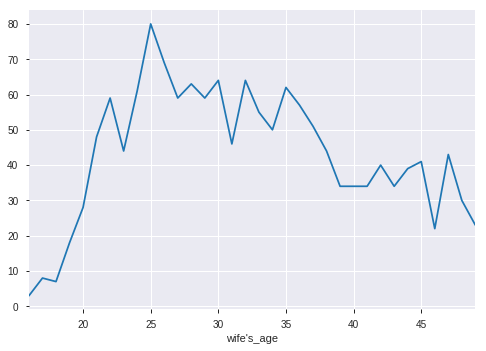

In [89]:
df.groupby("wife's_age")['number_of_children_ever_born'].count().plot()

In [93]:
x_test.iloc[4]

wife's_age                      22
wife's_education                 2
husband's_education              3
number_of_children_ever_born     1
wife's_religion                  1
wife's_now_working?              1
husband's_occupation             3
standard-of-living_index         3
media_exposure                   0
Name: 220, dtype: int64

In [94]:
# Reshape To A Single Sample (1,-1)
mysample2 = np.array(x_test.iloc[4]).reshape(1, -1)

In [95]:
exported_pipeline.predict(mysample2)

array([1])

In [96]:
# Show Explaination For A Single Prediction For A No User
eli5.show_prediction(exported_pipeline, x_test.iloc[4],feature_names=feature_names,target_names=class_names)

#### Narative
+ This individual is a no contraception user(1)
+ From the model intepretation, it shows that she has a probality of 0.558 of being a non_contraception user
+ The features used for this prediction are primarily , the number of children born which in her case is only one. 
+ Hence it makes sense since she has only one child and shee is also educated, hence she will not be thinking of using 
contraception because she may want a child

#### Save Model

In [98]:
from sklearn.externals import joblib
contraceptives_rf_model = open("contraceptives_rf_model.pkl","wb")
joblib.dump(exported_pipeline,contraceptives_rf_model)

In [99]:
contraceptives_rf_model.close()

#### Next Productionize 
+ with Streamlit
+ with Flask

#### By
+ Jesse E.Agbe(JCharis)
+ Jesus Saves @JCharisTech